In [ ]:
from zipfile import ZipFile
import pandas as pd

# Path to the uploaded ZIP file in Colab
zip_file_path = '/content/drive/MyDrive/Level_1_GBIF_training_data (1).zip'
target_file_name = 'occurrence.txt'

# Open the ZIP file and read the target file
with ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(target_file_name) as target_file:
        # Read the target file as a DataFrame
        df = pd.read_csv(target_file, sep='\t', low_memory=False)

# Ensure correct column names are used (based on your previous check)
columns_of_interest = ['gbifID', 'eventDate', 'decimalLatitude', 'decimalLongitude', 'level0Gid','species','occurrenceStatus']  # Update this list as needed

# Filter the DataFrame for the columns of interest
df = df[columns_of_interest]

# Convert 'eventDate' to datetime
df['eventDate'] = pd.to_datetime(df['eventDate'], errors='coerce')

# Filter the DataFrame for rows where 'eventDate' is between 2021 and 2022
filtered_df = df[(df['level0Gid'] == 'AUS') & (df['eventDate'].dt.year >= 2015) & (df['eventDate'].dt.year <= 2019) & (df['species'] == 'Litoria fallax')]

# Display the first 10 rows of the filtered DataFrame
filtered_df


,gbifID,eventDate,decimalLatitude,decimalLongitude,level0Gid,species,occurrenceStatus
17,2423011701,2019-08-28 09:24:00,-33.925746,151.164082,AUS,Litoria fallax,PRESENT
21,2236299662,2018-02-13 23:02:00,-31.732415,152.088515,AUS,Litoria fallax,PRESENT
23,2563750401,2017-10-25 21:07:00,-32.968624,151.644194,AUS,Litoria fallax,PRESENT
33,1850994254,2017-11-30 08:35:00,-33.093048,151.416300,AUS,Litoria fallax,PRESENT
40,2456512415,2016-04-17 11:12:00,-27.476426,152.977687,AUS,Litoria fallax,PRESENT
...,...,...,...,...,...,...,...
193484,1457334961,2017-01-23 00:00:00,-34.924979,150.647032,AUS,Litoria fallax,PRESENT
193486,3108865868,2019-02-03 00:00:00,-34.028797,151.225626,AUS,Litoria fallax,PRESENT
193507,3408189344,2019-12-24 21:22:00,-26.754987,152.839291,AUS,Litoria fallax,PRESENT
193510,2981077059,2018-11-22 03:59:00,-34.791600,150.779300,AUS,Litoria fallax,PRESENT


<ipython-input-4-31df2dfc1b36>:14: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


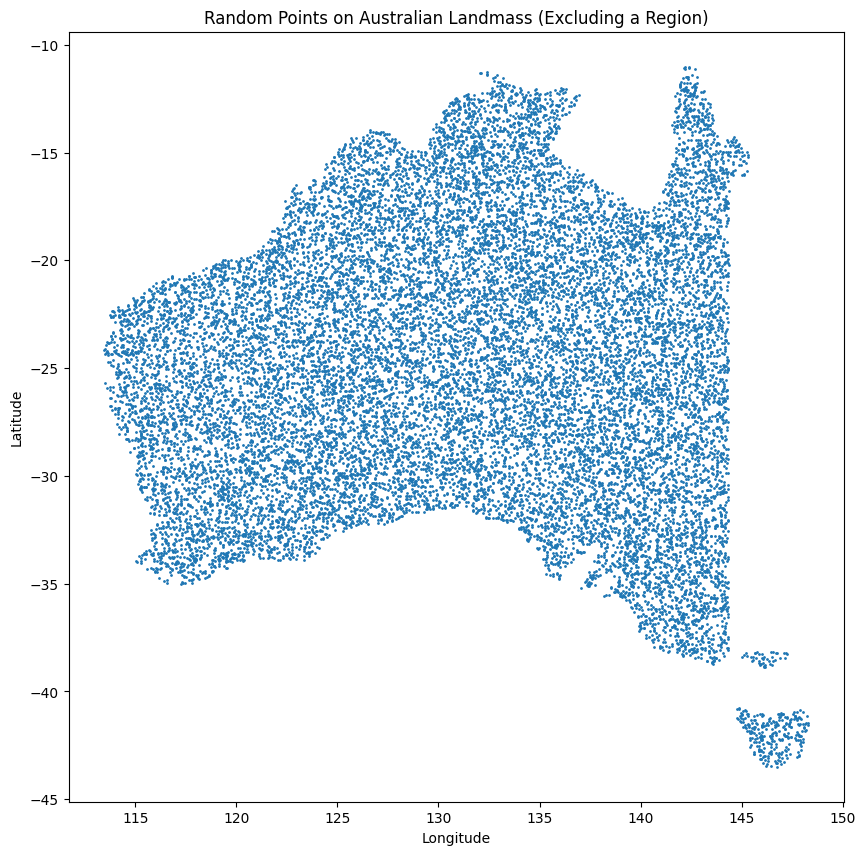

In [ ]:
import random
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Define the bounding box for Australia [min_lon, min_lat, max_lon, max_lat]
bbox_australia = [112.9211, -43.7405, 153.6394, -10.6873]

# Define the bounding box for the excluded region [min_lon, min_lat, max_lon, max_lat]
bbox_excluded = [144.35052, -38.1591, 153.624262, -16.048582]

# Load world map to check if points are on land
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Australian landmass
australia = world[(world['continent'] == "Oceania") & (world['name'] == "Australia")]

def generate_random_point(bbox):
    return [random.uniform(bbox[0], bbox[2]), random.uniform(bbox[1], bbox[3])]

def is_on_land(point, landmass):
    return landmass.contains(Point(point)).any()

def is_in_excluded_region(point, bbox):
    lon, lat = point
    return bbox[0] <= lon <= bbox[2] and bbox[1] <= lat <= bbox[3]

# Generate 27728 random points on Australian landmass excluding the specified region
points = []
while len(points) < 20000:
    point = generate_random_point(bbox_australia)
    if is_on_land(point, australia) and not is_in_excluded_region(point, bbox_excluded):
        points.append(point)

# Convert points to DataFrame
df_points = pd.DataFrame(points, columns=['Longitude', 'Latitude'])

# Plot
plt.figure(figsize=(10, 10))
plt.scatter(df_points['Longitude'], df_points['Latitude'], s=1)
plt.title('Random Points on Australian Landmass (Excluding a Region)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [ ]:
df_points

,Longitude,Latitude
0,124.417557,-26.440276
1,127.031383,-25.573033
2,130.631900,-27.357067
3,143.263959,-36.865983
4,138.436480,-32.779048
...,...,...
19995,126.518656,-17.429050
19996,119.010809,-32.551442
19997,132.680913,-25.292915
19998,139.305062,-19.006148


In [ ]:
# Maximum and minimum latitude
max_latitude = filtered_df['decimalLatitude'].max()
min_latitude = filtered_df['decimalLatitude'].min()

# Maximum and minimum longitude
max_longitude = filtered_df['decimalLongitude'].max()
min_longitude = filtered_df['decimalLongitude'].min()

print("Maximum Latitude:", max_latitude)
print("Minimum Latitude:", min_latitude)
print("Maximum Longitude:", max_longitude)
print("Minimum Longitude:", min_longitude)


Maximum Latitude: -16.048582
Minimum Latitude: -38.12691
Maximum Longitude: 153.614
Minimum Longitude: 144.35052


In [ ]:
import folium
import numpy as np

# Define the latitude and longitude bounds of the grid
lat_min, lat_max = -38.1591, -16.048582
lon_min, lon_max = 144.35052, 153.624262

# Calculate the center of the map
lat_center = (lat_min + lat_max) / 2
lon_center = (lon_min + lon_max) / 2

# Create a folium map centered around the middle of the bounds
m = folium.Map(location=[lat_center, lon_center], zoom_start=5)

# Define the number of grid lines you want
num_lat_lines = 10  # Number of latitude grid lines
num_lon_lines = 10  # Number of longitude grid lines

# Generate latitude lines
latitudes = np.linspace(lat_min, lat_max, num_lat_lines)
for lat in latitudes:
    folium.PolyLine(locations=[[lat, lon_min], [lat, lon_max]], color='red', weight=1).add_to(m)

# Generate longitude lines
longitudes = np.linspace(lon_min, lon_max, num_lon_lines)
for lon in longitudes:
    folium.PolyLine(locations=[[lat_min, lon], [lat_max, lon]], color='red', weight=1).add_to(m)

# Display the map
m


In [ ]:
import matplotlib.pyplot as plt

# Group the DataFrame by year and count the number of gbifID entries
yearly_counts = filtered_df.groupby(filtered_df['eventDate'].dt.year)['gbifID'].count()

# Plot the results
yearly_counts.plot(kind='bar', figsize=(10, 6))

plt.title('Number of Entries per Year')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)  # Rotate the x-axis labels to make them more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better readability
plt.show()


<ipython-input-9-0bc0fe35e3b4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Season'] = filtered_df['eventDate'].dt.month.apply(get_season)


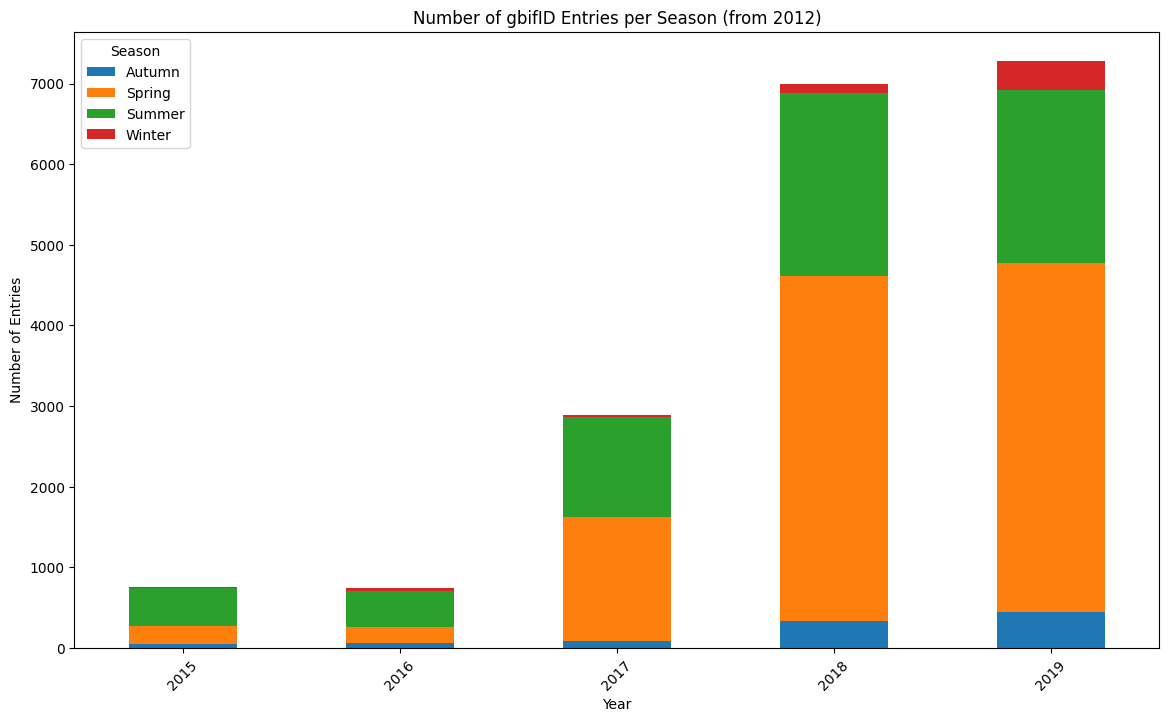

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define a function to categorize dates into seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

# Apply the function to the 'eventDate' column to create a new 'Season' column
filtered_df['Season'] = filtered_df['eventDate'].dt.month.apply(get_season)

# Filter the DataFrame for rows from 2012 onwards
filtered_df = filtered_df[filtered_df['eventDate'].dt.year >= 2012]

# Group by year and season, then count the number of gbifID entries
seasonal_counts = filtered_df.groupby([filtered_df['eventDate'].dt.year, 'Season'])['gbifID'].count().unstack(fill_value=0)

# Plot the results
seasonal_counts.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Number of gbifID Entries per Season (from 2012)')
plt.xlabel('Year')
plt.ylabel('Number of Entries')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.show()


In [ ]:
!pip install geopandas matplotlib


In [ ]:
!pip install geopandas contextily


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 42.2 MB/s eta 0:00:00


<ipython-input-12-9b9b049dbc6f>:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Note: This line will still trigger the deprecation warning


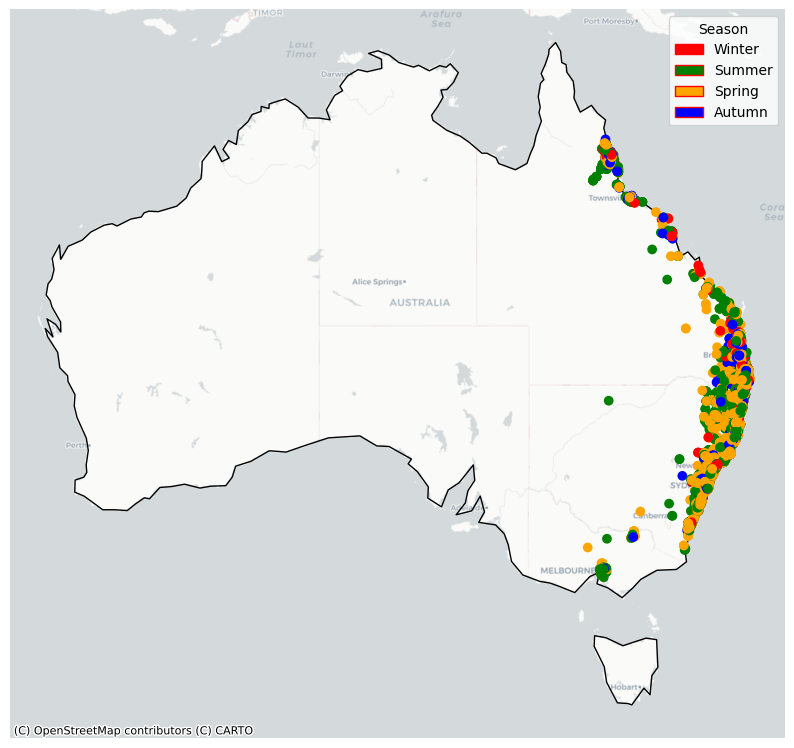

In [ ]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch  # Import Patch from matplotlib.patches

# Assuming 'filtered_df' has been defined earlier
# Load a map of the world
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))  # Note: This line will still trigger the deprecation warning

# Filter for Australia using the country name
australia = world[world.name == "Australia"]

# Convert filtered_df's latitude and longitude to a GeoDataFrame
gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.decimalLongitude, filtered_df.decimalLatitude))

# Set the coordinate reference system (CRS) to WGS84 (epsg:4326) and then to Web Mercator (epsg:3857) for contextily compatibility
gdf.crs = "EPSG:4326"
gdf = gdf.to_crs(epsg=3857)

# Define the color for each season
season_colors = {
    'Winter': 'red',
    'Summer': 'green',
    'Spring': 'orange',
    'Autumn': 'blue'
}

# Map the 'Season' column to the corresponding color
gdf['color'] = gdf['Season'].map(season_colors)

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

# Plot Australia
australia.to_crs(epsg=3857).plot(ax=ax, color='none', edgecolor='black')

# Plot the points, colored by the 'color' column
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, color=gdf['color'])

# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)

# Remove x and y axis for cleaner look
ax.set_axis_off()

# Create a legend
legend_patches = [Patch(facecolor=color, edgecolor='r', label=season) for season, color in season_colors.items()]

# Add the legend to the plot
plt.legend(handles=legend_patches, title='Season')

plt.show()


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import random

# Assuming 'australia' is a GeoDataFrame with the Australian landmass
# and 'gdf' is a GeoDataFrame with existing points

# Create a mask for existing points, assuming a buffer distance (in degrees)
# Adjust the buffer size as needed
buffer_size = 0.01  # Example buffer size, you may need to adjust this
point_buffers = gdf.buffer(buffer_size)

# Combine the buffered areas into a single geometry
combined_buffers = point_buffers.unary_union

# Subtract the buffered areas from the Australian polygon to get the remaining area
remaining_area = australia.geometry.unary_union.difference(combined_buffers)

# Function to generate a random point within the bounding box of Australia
def generate_random_point_within_polygon(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            return pnt

# Generate 15000 random points within the remaining area
points = [generate_random_point_within_polygon(remaining_area) for _ in range(15000)]

# Convert the list of points to a GeoDataFrame
new_points_gdf = gpd.GeoDataFrame(geometry=points, crs=australia.crs)

# If you want to store these points in a pandas DataFrame (without spatial information)
new_points_df = pd.DataFrame({
    'Longitude': [pnt.x for pnt in points],
    'Latitude': [pnt.y for pnt in points]
})

# new_points_gdf now contains the new GeoDataFrame with the generated points
# new_points_df contains a DataFrame with longitude and latitude columns


In [ ]:
new_points_df

,Longitude,Latitude
0,141.209324,-29.064014
1,146.215640,-31.817738
2,130.377704,-28.799996
3,126.911794,-24.256838
4,143.618016,-17.757427
...,...,...
14995,116.235801,-32.323735
14996,142.385704,-15.105401
14997,138.925753,-21.216511
14998,127.617982,-27.580991


Streaming output truncated to the last 5000 lines.
<ipython-input-15-3c28ad192969>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_points_df = new_points_df.append({
<ipython-input-15-3c28ad192969>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_points_df = new_points_df.append({
<ipython-input-15-3c28ad192969>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_points_df = new_points_df.append({
<ipython-input-15-3c28ad192969>:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_points_df = new_points_df.append({
<ipython-input-15-3c28ad192969>:41: FutureWarning: The frame.append method is deprecated and will be removed 

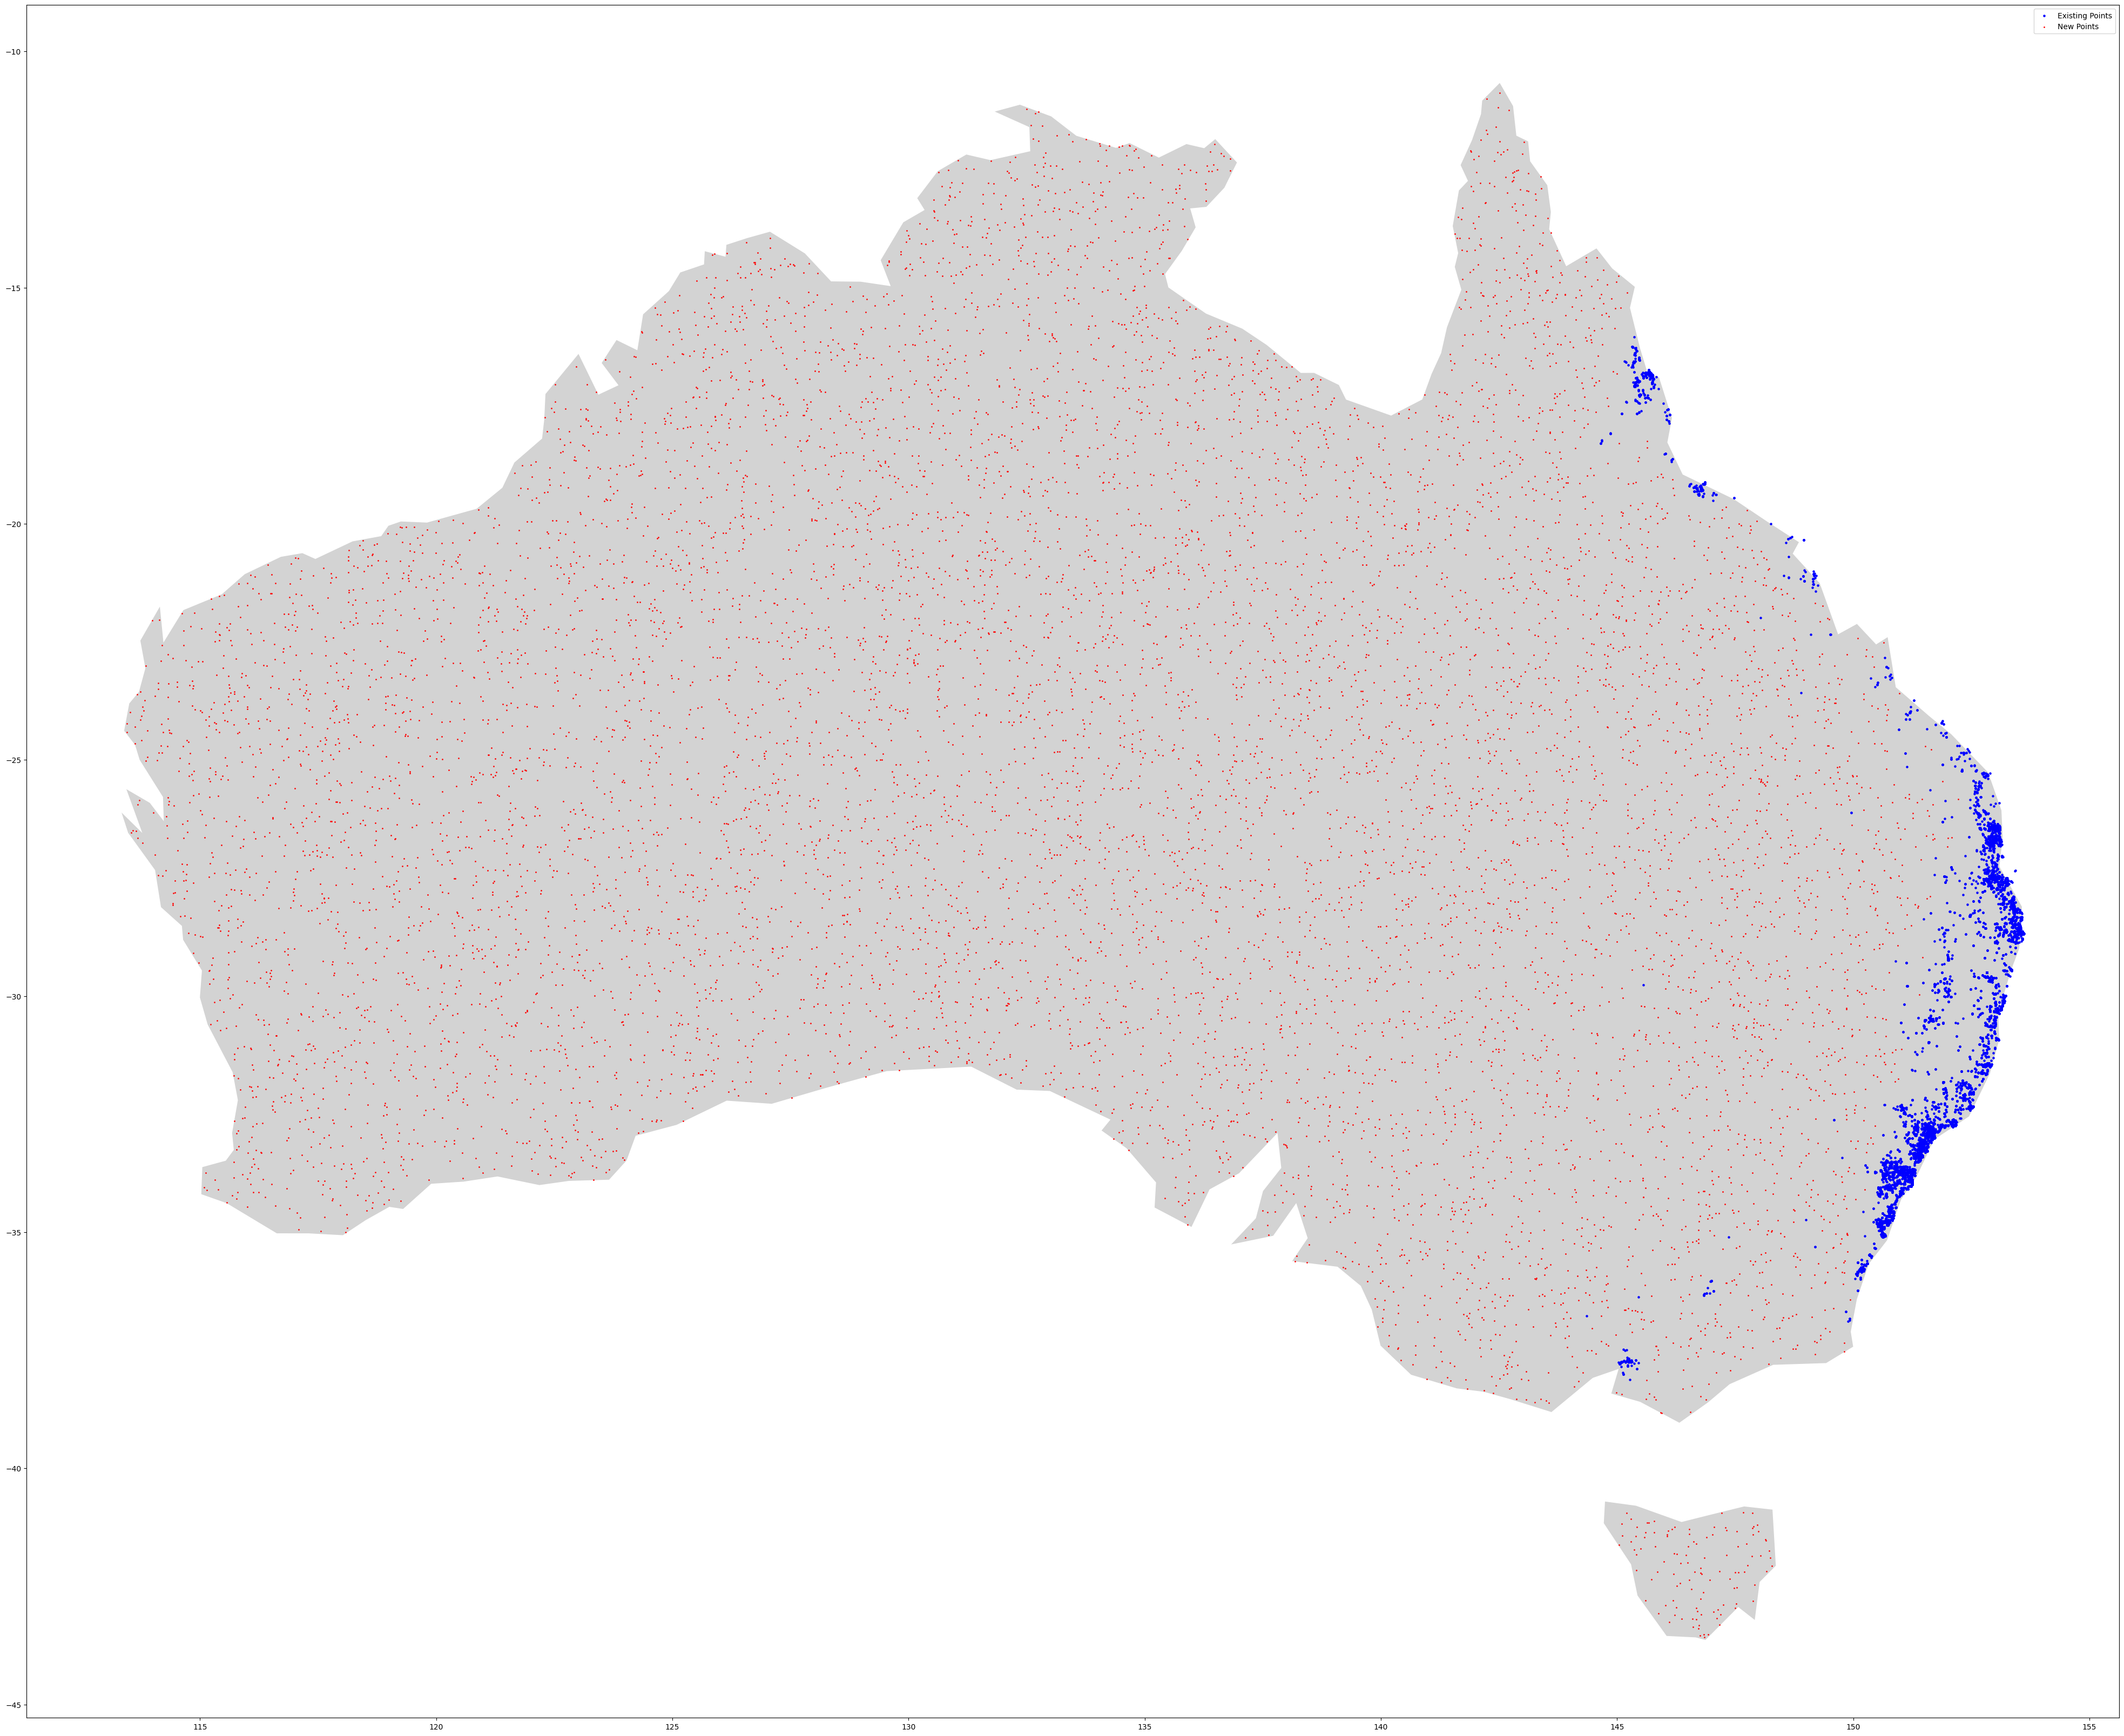

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
import random

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Australia
australia = world[world.name == "Australia"]

# Assuming 'filtered_df' is your existing DataFrame with points in Australia
# Assuming 'filtered_df' has 'geometry' column with Point geometries
filtered_gdf = gpd.GeoDataFrame(filtered_df, geometry=gpd.points_from_xy(filtered_df.decimalLongitude, filtered_df.decimalLatitude))

# Create a buffer around existing points to exclude these areas (optional, depending on your requirements)
# Here, the buffer size is an arbitrary value, which you might need to adjust
buffered_points = gpd.GeoDataFrame(geometry=filtered_gdf.geometry.buffer(0.25))  # Adjust buffer size as needed

# Create an empty DataFrame to store new points
new_points_df = pd.DataFrame(columns=['gbifID','eventDate','decimalLatitude','decimalLongitude', 'level0Gid','species','occurrenceStatus'])



# Function to generate a random point within Australia
def generate_random_point_within_polygon(polygon):
    minx, miny, maxx, maxy = polygon.bounds
    while True:
        pnt = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
        if polygon.contains(pnt):
            return pnt

# Generate 15,000 new points
count = 0
while count < 10000:
    random_point = generate_random_point_within_polygon(australia.geometry.iloc[0])
    # Check if the point is not in the buffered areas of existing points
    if not buffered_points.contains(random_point).any():
        # Add the point to the DataFrame
        new_points_df = new_points_df.append({
          'gbifID': "",  # Empty string for gbifID
          'eventDate': "",  # Empty string for eventDate
          'decimalLongitude': random_point.x,  # Longitude from the generated point
          'decimalLatitude': random_point.y,  # Latitude from the generated point
          'level0Gid': "AUS",  # Set to "AUS" for Australia
          'species': "Litoria fallax",  # Specified species
          'occurrenceStatus': "ABSENT"  # Set to "ABSENT"
        }, ignore_index=True)
        count += 1

# Convert the DataFrame to a GeoDataFrame
new_gdf = gpd.GeoDataFrame(new_points_df, geometry=gpd.points_from_xy(new_points_df.decimalLongitude, new_points_df.decimalLatitude))

# Plotting
fig, ax = plt.subplots(figsize=(50, 50))
australia.plot(ax=ax, color='lightgrey')  # Plotting the Australia outline
filtered_gdf.plot(ax=ax, color='blue', markersize=5, label='Existing Points')  # Plotting existing points
new_gdf.plot(ax=ax, color='red', markersize=1, label='New Points')  # Plotting new points
plt.legend()
plt.show()


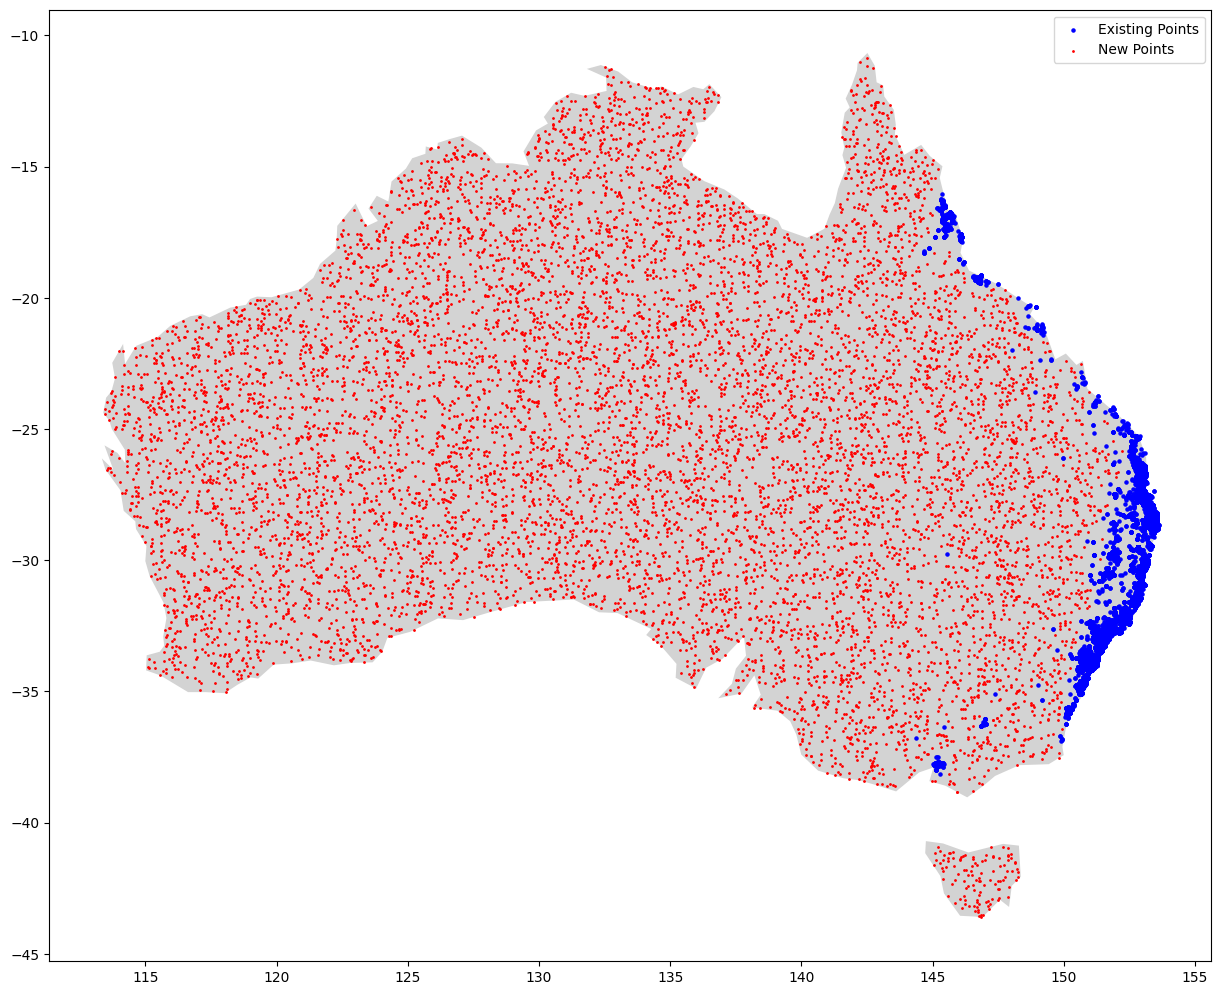

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
australia.plot(ax=ax, color='lightgrey')  # Plotting the Australia outline
filtered_gdf.plot(ax=ax, color='blue', markersize=5, label='Existing Points')  # Plotting existing points
new_gdf.plot(ax=ax, color='red', markersize=1, label='New Points')  # Plotting new points
plt.legend()
plt.show()

In [ ]:
new_gdf

,gbifID,eventDate,decimalLatitude,decimalLongitude,level0Gid,species,occurrenceStatus,geometry
0,,,-29.965479,118.013503,AUS,Litoria fallax,ABSENT,POINT (118.01350 -29.96548)
1,,,-29.337825,146.170536,AUS,Litoria fallax,ABSENT,POINT (146.17054 -29.33783)
2,,,-26.747205,129.643410,AUS,Litoria fallax,ABSENT,POINT (129.64341 -26.74720)
3,,,-15.470859,126.470678,AUS,Litoria fallax,ABSENT,POINT (126.47068 -15.47086)
4,,,-15.281667,129.687527,AUS,Litoria fallax,ABSENT,POINT (129.68753 -15.28167)
...,...,...,...,...,...,...,...,...
9995,,,-23.874370,125.616674,AUS,Litoria fallax,ABSENT,POINT (125.61667 -23.87437)
9996,,,-23.349829,125.422984,AUS,Litoria fallax,ABSENT,POINT (125.42298 -23.34983)
9997,,,-26.993500,127.997888,AUS,Litoria fallax,ABSENT,POINT (127.99789 -26.99350)
9998,,,-37.593860,145.873711,AUS,Litoria fallax,ABSENT,POINT (145.87371 -37.59386)


In [ ]:
# Drop the 'geometry' column from 'new_gdf'
new_gdf = new_gdf.drop(columns=['geometry'])



new_gdf


,gbifID,eventDate,decimalLatitude,decimalLongitude,level0Gid,species,occurrenceStatus
0,,,-29.965479,118.013503,AUS,Litoria fallax,ABSENT
1,,,-29.337825,146.170536,AUS,Litoria fallax,ABSENT
2,,,-26.747205,129.643410,AUS,Litoria fallax,ABSENT
3,,,-15.470859,126.470678,AUS,Litoria fallax,ABSENT
4,,,-15.281667,129.687527,AUS,Litoria fallax,ABSENT
...,...,...,...,...,...,...,...
9995,,,-23.874370,125.616674,AUS,Litoria fallax,ABSENT
9996,,,-23.349829,125.422984,AUS,Litoria fallax,ABSENT
9997,,,-26.993500,127.997888,AUS,Litoria fallax,ABSENT
9998,,,-37.593860,145.873711,AUS,Litoria fallax,ABSENT


In [ ]:
filtered_df

filtered_df = filtered_df.drop(columns=['Season'])

In [ ]:
union_df = pd.concat([filtered_df, new_points_df], ignore_index=True)

In [ ]:
union_df['occurrenceStatus'] = union_df['occurrenceStatus'].apply(lambda x: 0 if x == "ABSENT" else 1)


In [ ]:
union_df

,gbifID,eventDate,decimalLatitude,decimalLongitude,level0Gid,species,occurrenceStatus
0,2423011701,2019-08-28 09:24:00,-33.925746,151.164082,AUS,Litoria fallax,1
1,2236299662,2018-02-13 23:02:00,-31.732415,152.088515,AUS,Litoria fallax,1
2,2563750401,2017-10-25 21:07:00,-32.968624,151.644194,AUS,Litoria fallax,1
3,1850994254,2017-11-30 08:35:00,-33.093048,151.416300,AUS,Litoria fallax,1
4,2456512415,2016-04-17 11:12:00,-27.476426,152.977687,AUS,Litoria fallax,1
...,...,...,...,...,...,...,...
28666,,,-23.874370,125.616674,AUS,Litoria fallax,0
28667,,,-23.349829,125.422984,AUS,Litoria fallax,0
28668,,,-26.993500,127.997888,AUS,Litoria fallax,0
28669,,,-37.593860,145.873711,AUS,Litoria fallax,0


In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter

# Extract features (X) and target variable (y) from all_frog_data
X = union_df[['decimalLatitude', 'decimalLongitude']]
y = union_df["occurrenceStatus"]

# Print original dataset shape
print(f"Original dataset shape: {Counter(y)}")

# Apply SMOTE to oversample the minority class
sm = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Print resampled dataset shape
print(f"Resampled dataset shape: {Counter(y_resampled)}")

Original dataset shape: Counter({1: 18671, 0: 10000})
Resampled dataset shape: Counter({1: 18671, 0: 18671})


In [ ]:

# Assuming 'X_resampled' and 'y_resampled' are the outputs from the SMOTE resampling

# Combine the resampled features and target variable into a new DataFrame
#resampled_df = pd.DataFrame(X_resampled, columns=['decimalLatitude', 'decimalLongitude'])
#resampled_df['occurrenceStatus'] = y_resampled

# Export the DataFrame to a CSV file
union_df.to_csv('resampled_frog_data_18t19_new.csv', index=False)

print("Resampled dataset saved to 'resampled_frog_data.csv'")


Resampled dataset saved to 'resampled_frog_data.csv'


In [ ]:
resampled_df

NameError: name 'resampled_df' is not defined

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt



# Step 2: Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(resampled_df, geometry=gpd.points_from_xy(resampled_df.decimalLongitude, resampled_df.decimalLatitude))

# Set the coordinate reference system (CRS) to WGS84
gdf.crs = "EPSG:4326"

# Step 3: Load a map of Australia
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
australia = world[world.name == "Australia"]

# Step 4: Plot the points on the map with color coding
fig, ax = plt.subplots(figsize=(25, 25))
australia.plot(ax=ax, color='lightgrey')  # Plot Australia as the background

# Plot the resampled points with color coding
gdf.plot(ax=ax, column='occurrenceStatus', cmap='viridis', legend=True, markersize=5)

# Optional: Customize the legend
leg = ax.get_legend()
leg.set_bbox_to_anchor((1, 0.5))
leg.set_title('Occurrence Status')

plt.show()


In [ ]:
!pip install pystac


In [ ]:
!pip install pystac fsspec xarray zarr dask



In [ ]:
!pip install contextily
!pip install stackstac
!pip install pystac
!pip install pystac_client
!pip install planetary_computer
!pip install zarr
!pip install xarray[complete]

In [ ]:

import pandas as pd



# Define the path to the CSV file within your Google Drive
file_path = '/content/drive/MyDrive/merged_df.csv'

# Read the CSV file using pandas
merged_df = pd.read_csv(file_path)

# Display the DataFrame
print(merged_df)


In [ ]:
merged_df